In [2]:
from qiskit import QuantumCircuit, transpile
import random
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

### Step 1: Map the problem to circuits and operators

In [3]:
def create_bell_pair(qc, a, b):
  qc.h(a)
  qc.cx(a, b)

In [4]:
def encode_message(qc, qubit, message):
  if ((message[0] != 0 | message[0] != 1) & (message[1] != 0 | message[1] != 1)):
    print("Invalid message")
    return
    
  if (message[1] == 1):
    qc.z(qubit)

  if (message[0] == 1):
    qc.x(qubit)

In [5]:
def decode(qc, a, b):
  qc.cx(a, b)
  qc.h(a)

In [25]:
qc = QuantumCircuit(2)
create_bell_pair(qc, 0, 1)

In [26]:
message = [random.randint(0, 1), random.randint(0, 1)]
message

[1, 0]

In [27]:
encode_message(qc, 0, message)

In [28]:
decode(qc, 0, 1)

In [29]:
qc.measure_all()

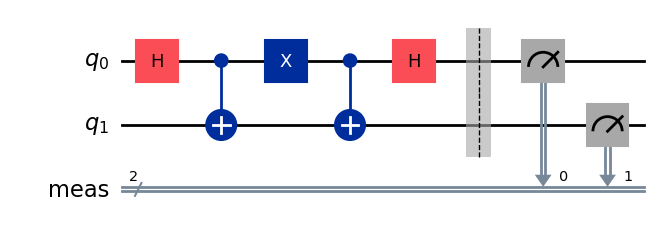

In [30]:
qc.draw(output='mpl')

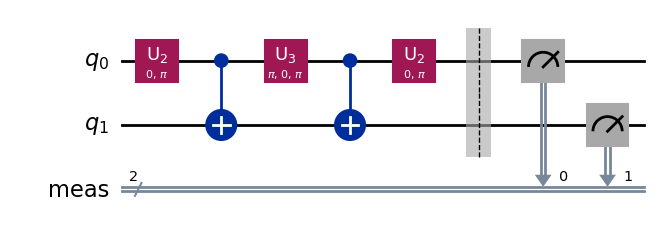

In [31]:
qc.decompose().draw(output='mpl')

### Step 2: Optimize the circuit

### Step 3: Run the circuit on a backend

In [32]:
from qiskit_aer.primitives import SamplerV2

sampler = SamplerV2()

job = sampler.run([qc], shots=128)
job_result = job.result()

In [33]:
meas_counts = job_result[0].data.meas.get_counts()

In [34]:
meas_counts

{'10': 128}